<a href="https://colab.research.google.com/github/TCB09/202255202117-Teguh/blob/master/Deep%20Learning%20-%20Klasifikasi%20Pohon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam



In [5]:
dataset_path = '/content/drive/MyDrive/dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # otomatis bagi 80% train, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 998 images belonging to 4 classes.
Found 247 images belonging to 4 classes.


In [6]:

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze layer awal

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-6-2ffb32e40cb1>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 500s 16s/step - accuracy: 0.3684 - loss: 1.5237 - val_accuracy: 0.6883 - val_loss: 0.8560
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6392 - loss: 0.8589 - val_accuracy: 0.7692 - val_loss: 0.6255
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7581 - loss: 0.6605 - val_accuracy: 0.7976 - val_loss: 0.5510
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8197 - loss: 0.5079 - val_accuracy: 0.8097 - val_loss: 0.5141
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8584 - loss: 0.4599 - val_accuracy: 0.8704 - val_loss: 0.4396
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8731 - loss: 0.4280 - val_accuracy: 0.8259 - val_loss: 0.4809
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9023 - loss: 0.3567 - val_accuracy: 0.8462 - val_loss: 0.4380
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9155 - loss: 0.3316 - val_accuracy: 0.8623 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
              precision    recall  f1-score   support

 pohon_jambu       0.87      0.79      0.83        61
pohon_kelapa       1.00      0.79      0.88        62
pohon_mangga       0.72      0.89      0.79        63
pohon_pisang       0.89      0.95      0.92        61

    accuracy                           0.85       247
   macro avg       0.87      0.85      0.86       247
weighted avg       0.87      0.85      0.86       247



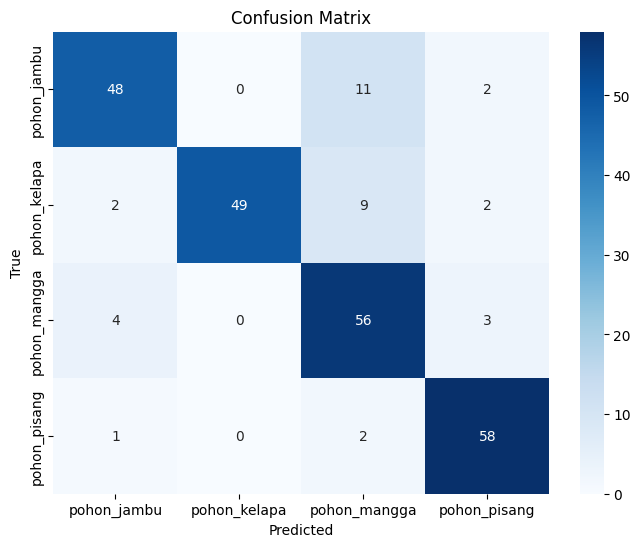

In [8]:
# Evaluasi
val_data.reset()
pred = model.predict(val_data)
predicted_classes = np.argmax(pred, axis=1)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


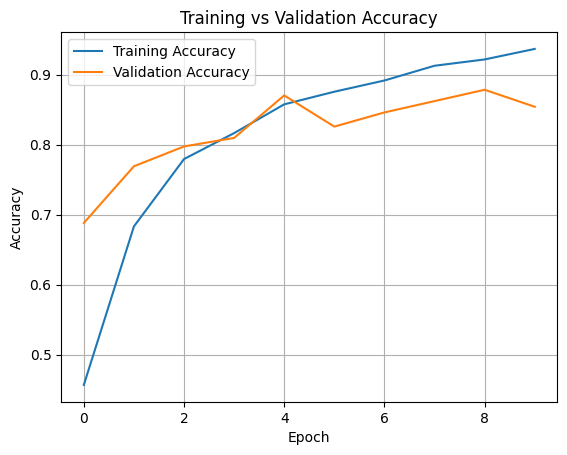

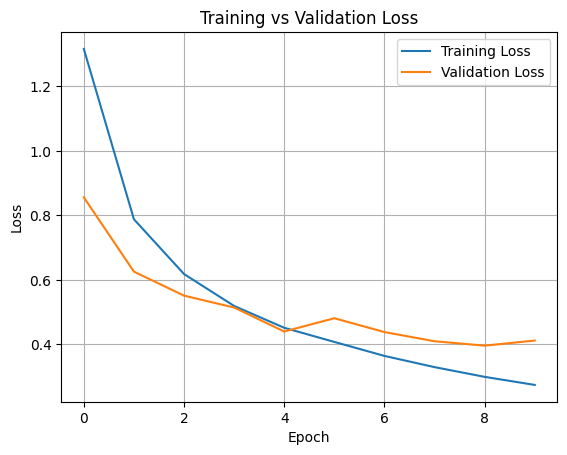

In [9]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()